In [ ]:
import torch
torch.cuda.empty_cache()
from torch.utils.data import TensorDataset, Dataset, DataLoader, RandomSampler
from transformers import BertTokenizer, BertModel, BertForMaskedLM, AutoTokenizer, AutoModel, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup

In [1]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_devices[0],True)
logical_devices = tf.config.list_logical_devices("GPU")
from tf_geometric.utils import tf_utils
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow import keras
import tf_geometric as tfg

import os
import re
import time
import datetime
import math
import json
import random
import pickle
from tqdm import tqdm
import numpy as np
import pandas as pd
import seaborn as sns

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tag import pos_tag, pos_tag_sents
from nltk.stem import PorterStemmer
from string import punctuation
from collections import Counter

import missingno as msno
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
import gensim
from gensim.models.word2vec import Word2Vec
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, SimpleRNN, LSTM

from gensim.models import Word2Vec, KeyedVectors
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, GRU, Dense, SimpleRNN, LSTM, Dropout
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report , accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer as tfidf
from sklearn.linear_model import LogisticRegressionCV 
from sklearn import preprocessing

random.seed(200)
np.random.seed(200)
tf.random.set_seed(200)

c:\Users\Ying Jhu\anaconda3\envs\env_1\lib\site-packages\seaborn\rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
c:\Users\Ying Jhu\anaconda3\envs\env_1\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
[nltk_data] Downloading package stopwords to C:\Users\Ying
[nltk_data]     Jhu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Ying
[nltk_data]     Jhu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Ying
[nltk_data]     Jhu\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Ying
[nltk_data]     Jhu\AppData\Ro

In [2]:
train=pd.read_csv('CT22_english_1C_harmful_train+val.txt',sep='\t')
test=pd.read_csv('CT22_english_1C_harmful_dev_test.tsv',sep='\t')
train

,topic,tweet_id,tweet_url,tweet_text,class_label
0,COVID-19,1.359351e+18,http://twitter.com/user/status/135935094335617...,"India's gift of 100,000 COVID-19 vaccines arri...",0
1,COVID-19,1.350166e+18,http://twitter.com/user/status/135016568806166...,Here’s what I’m doing while I wait my turn for...,0
2,COVID-19,1.369750e+18,http://twitter.com/user/status/136974953915491...,"This afternoon, I’m hosting an event with the ...",0
3,COVID-19,1.350165e+18,http://twitter.com/user/status/135016499568693...,"Help shops like mine stay open. Mask up, avoid...",0
4,COVID-19,1.370008e+18,http://twitter.com/user/status/137000807648978...,As part of the ongoing nationwide vaccination ...,0
...,...,...,...,...,...
3625,COVID-19,1.242137e+18,http://twitter.com/user/status/124213681646938...,my flintstones gummies from 15 years ago fight...,0
3626,COVID-19,1.236095e+18,http://twitter.com/user/status/123609539969108...,#COVIDã¼19 Something we all need to be aware ...,1
3627,COVID-19,1.370092e+18,http://twitter.com/user/status/137009191790463...,"Some of the most vulnerable people in Alabama,...",0
3628,COVID-19,1.369492e+18,http://twitter.com/user/status/136949228214833...,It would be great if our first responders coul...,0


In [2]:
train=pd.read_csv('train_aug.csv',sep=',',encoding='ISO-8859-1')
test=pd.read_csv('CT22_english_1C_harmful_dev_test.tsv',sep='\t')
train

,Unnamed: 0,tweet_text,class_label
0,0,"India's gift of 100,000 COVID-19 vaccines arri...",0
1,1,Here?s what I?m doing while I wait my turn f...,0
2,2,"This afternoon, I?m hosting an event with the...",0
3,3,"Help shops like mine stay open. Mask up, avoid...",0
4,4,As part of the ongoing nationwide vaccination ...,0
...,...,...,...
6506,2902,@realDonaldTrump Donald scoop scrub his actuat...,1
6507,2903,New York AG monish televangelist #JimBakker To...,1
6508,2904,"Zika, Ebola, Lyme disease, German measles, spa...",1
6509,2905,The President wonÃ¢??t let uracil witness this...,1


## EDA

<AxesSubplot:>

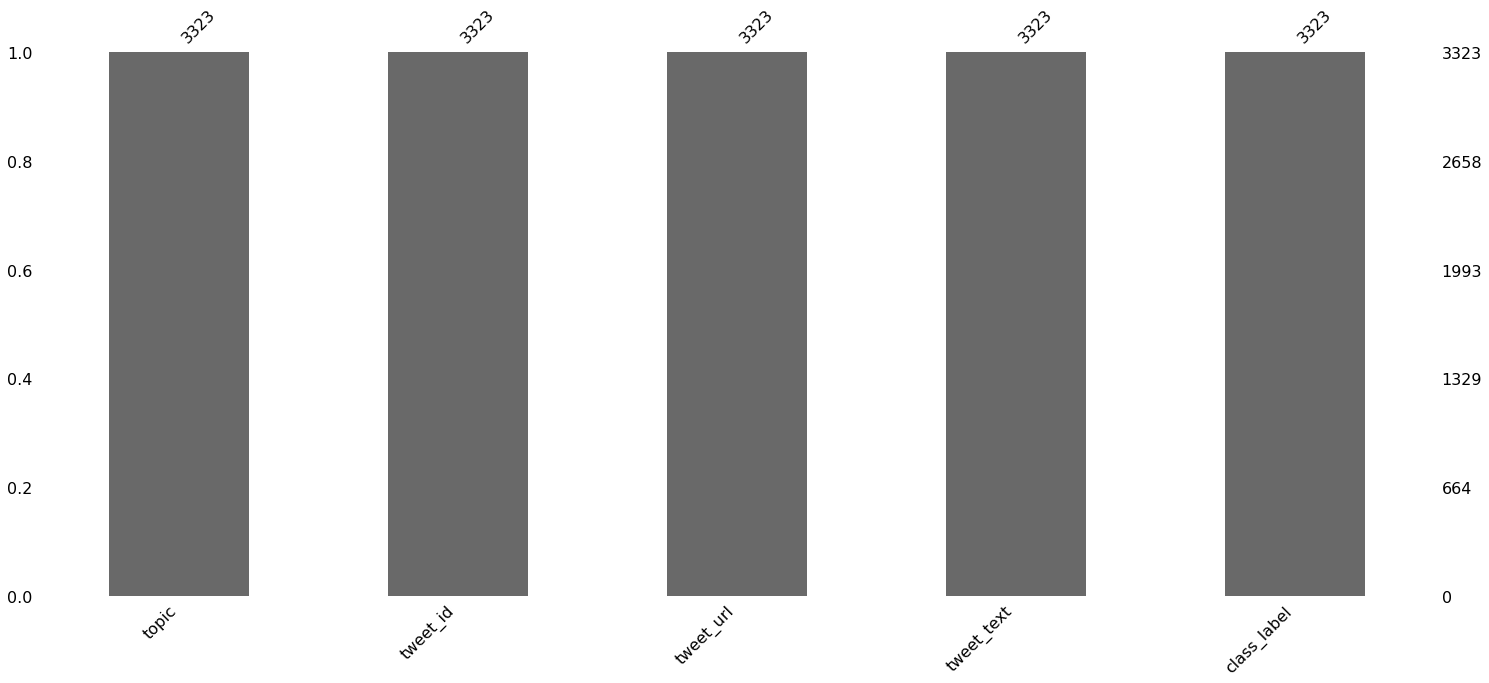

In [31]:
msno.bar(train)

<BarContainer object of 2 artists>

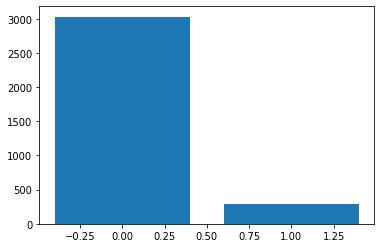

In [16]:
grouped=train.groupby("class_label")
label=grouped["class_label"].count()
plt.bar([0,1], label)

In [32]:
Y=train[train.class_label==1]
N=train[train.class_label==0]

Y_text=[]
for i in Y["tweet_text"]:
    i=i.strip('"')
    Y_text.append(i)
Y_text=" ".join(Y_text)

N_text=[]
for i in N["tweet_text"]:
    i=i.strip('"')
    N_text.append(i)
N_text=" ".join(N_text)

#stop_words=set(stopwords.words('english'))
#stop_words.update({'.','@',',','#',':','!','A','I',')','(','//',"'s",'https','http','&',"'m",'The','?','By','-',';','...','[',']','|','s',"'",'/','*'})
word_tokens=word_tokenize(Y_text)
#final_text=[w for w in word_tokens if not w in stop_words]
count=Counter(word_tokens)
result=count.most_common(50)
print("Y: ",result,'\n')

#stop_words=set(stopwords.words('english'))
#stop_words.update({'.','@',',','#',':','!','A','I',')','(','//',"'s",'https','http','&',"'m",'The','?','By','-',';','...','[',']','|','s',"'",'/','*'})
word_tokens=word_tokenize(N_text)
#final_text=[w for w in word_tokens if not w in stop_words]
count=Counter(word_tokens)
result=count.most_common(50)
print("N: ",result,'\n')


#{'.','the',',',':','and','to','https','of','#','a','in','for','that','’','is','are','on','it'}

Y:  [('.', 469), ('the', 419), (',', 343), (':', 289), ('and', 272), ('to', 244), ('https', 224), ('of', 208), ('#', 180), ('vaccines', 174), ('a', 161), ('in', 141), ('@', 135), ('is', 129), ('for', 123), ('vaccine', 104), ('that', 92), ('are', 80), ('’', 71), ('COVID-19', 68), ('on', 67), ('not', 63), ('The', 60), ('have', 59), ('it', 59), ('you', 56), ('!', 51), ('people', 49), ('be', 48), (';', 48), ('has', 47), ("'s", 46), ('with', 45), ('will', 45), ('from', 45), ('this', 44), ('&', 42), ('about', 39), ('“', 39), ('they', 39), ('coronavirus', 38), ('can', 36), ('by', 36), ('”', 35), ('more', 35), ('Covid-19', 35), ('I', 33), ('-', 33), ('%', 32), ('COVID', 32)] 

N:  [('.', 4243), (':', 4041), ('the', 3986), ('and', 3574), (',', 3541), ('https', 3138), ('to', 3056), ('vaccines', 2316), ('of', 2126), ('#', 2104), ('@', 1763), ('COVID-19', 1528), ('in', 1430), ('a', 1256), ('for', 1250), ('vaccine', 1068), ('is', 993), ('are', 864), ('on', 805), ('that', 618), ('’', 604), ('with', 

## Text Augmentation

In [3]:
from textaugment import EDA

def text_augment(data,n): # n:replace # of words
    t=EDA()
    positive_df=data[data.class_label==1]
    negative_df=data[data.class_label==0]
    add_text=[]
    if len(positive_df)>len(negative_df):
        for i in range(math.floor(len(positive_df)/len(negative_df))-1):
            for j in range(len(negative_df)):
                result=t.synonym_replacement(negative_df.iloc[j]['tweet_text'],n)
                add_text.append([result,negative_df.iloc[j]['class_label']])
    if len(positive_df)<len(negative_df):
        for i in range(math.floor(len(negative_df)/len(positive_df))-1):
            for j in range(len(positive_df)):
                result=t.synonym_replacement(positive_df.iloc[j]['tweet_text'],n)
                add_text.append([result,positive_df.iloc[j]['class_label']])
    new=pd.concat([data,pd.DataFrame(add_text,columns=['tweet_text','class_label'])])
    return new

train=train.iloc[:,3:5]
train=text_augment(train,5)

## Preprocessing

In [3]:
# corpus to Word2Vec
def all_corpus(data,stopword=False):
    positive_df=data[data.class_label==1]
    negative_df=data[data.class_label==0]
    positive_df=positive_df.dropna(subset=["tweet_text"])
    negative_df=negative_df.dropna(subset=["tweet_text"])
    positive_df=positive_df["tweet_text"].reset_index()
    for i in range(len(positive_df)):
        word_tokens1=word_tokenize(positive_df['tweet_text'][i].lower())
        final_text1=word_tokens1
        if stopword==True:
            stop_words=set(stopwords.words('english'))
            final_text1=[w for w in word_tokens1 if not w in stop_words]
        positive_df['tweet_text'][i]=final_text1
    positive_df=positive_df.drop('index',axis=1)
    positive_df['class_label']=np.repeat(1,len(positive_df))
    negative_df=negative_df["tweet_text"].reset_index()
    for i in range(len(negative_df)):
        word_tokens2=word_tokenize(negative_df['tweet_text'][i].lower())
        final_text2=word_tokens2
        if stopword==True:
            stop_words=set(stopwords.words('english'))
            final_text2=[w for w in word_tokens2 if not w in stop_words]
        negative_df['tweet_text'][i]=final_text2
    negative_df=negative_df.drop('index',axis=1)
    negative_df['class_label']=np.repeat(0,len(negative_df))
    ddf=pd.concat([positive_df,negative_df])
    return ddf

def text_to_index(corpus_all,word2idx):
    new_corpus=[]
    for doc in corpus_all:
        new_doc=[]
        for word in doc:
            try:
                new_doc.append(word2idx[word])
            except:
                new_doc.append(0)
        new_corpus.append(new_doc)
    return np.array(new_corpus)

# model
def RNN_model(embedding_layer):
    optimizer=Adam(learning_rate=0.00001)
    model=Sequential()
    model.add(embedding_layer)
    model.add(SimpleRNN(64))
    model.add(Dense(32,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return model

def GRU_model(embedding_layer):
    optimizer=Adam(learning_rate=0.00001)
    model=Sequential()
    model.add(embedding_layer)
    model.add(GRU(64))
    model.add(Dense(32,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return model

def LSTM_model(embedding_layer):
    optimizer=Adam(learning_rate=0.00001)
    model=Sequential()
    model.add(embedding_layer)
    model.add(LSTM(64))
    model.add(Dense(32,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return model

# plot
def chart(fit_details, metric):
    plt.plot(fit_details.history[metric])
    plt.plot(fit_details.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])
    plt.show()

In [4]:
random.seed(200)
np.random.seed(200)
tf.random.set_seed(200)

stopword=True
train_data=train
test_data=test
train_data=all_corpus(train_data,stopword=stopword)
test_data=all_corpus(test_data,stopword=stopword)
corpus=pd.concat([train_data.tweet_text,test_data.tweet_text])
w2v_model=Word2Vec(corpus,vector_size=500,epochs=10,sg=1)
embedding_matrix=np.zeros((len(w2v_model.wv.key_to_index.items())+1,w2v_model.vector_size))
#w2v_model=gensim.models.KeyedVectors.load_word2vec_format('C:/Users/Ying Jhu/Desktop/y_360W_cbow_2D_100dim_2020v1.bin',unicode_errors='ignore',binary=True)
#embedding_matrix=np.zeros((len(w2v_model.key_to_index.items())+1,w2v_model.vector_size))
word2idx={}
vocab_list=[(word,w2v_model.wv[word]) for word,_ in w2v_model.wv.key_to_index.items()]
#vocab_list=[(word,w2v_model[word]) for word,_ in w2v_model.key_to_index.items()]
for i,vocab in enumerate(vocab_list):
    word,vec=vocab
    embedding_matrix[i+1]=vec
    word2idx[word]=i+1
embedding_layer=Embedding(input_dim=embedding_matrix.shape[0],output_dim=embedding_matrix.shape[1],weights=[embedding_matrix],trainable=True)
np.random.seed(200)
train_data=train_data.sample(frac=1).reset_index(drop=True)
np.random.seed(200)
test_data=test_data.sample(frac=1).reset_index(drop=True)
X=text_to_index(train_data.tweet_text,word2idx)
X=pad_sequences(X,maxlen=60,padding='post')
Y=train_data.class_label
X_test=text_to_index(test_data.tweet_text,word2idx)
X_test=pad_sequences(X_test,maxlen=60,padding='post')
Y_test=test_data.class_label

C:\Users\YINGJH~1\AppData\Local\Temp/ipykernel_26656/552860300.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_df['tweet_text'][i]=final_text1
C:\Users\YINGJH~1\AppData\Local\Temp/ipykernel_26656/552860300.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_df['tweet_text'][i]=final_text2
C:\Users\YINGJH~1\AppData\Local\Temp/ipykernel_26656/552860300.py:40: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' whe

## Modeling

Epoch 1/100
163/163 [==============================] - 3s 12ms/step - loss: 0.6935 - accuracy: 0.4896 - val_loss: 0.6929 - val_accuracy: 0.5004
Epoch 2/100
163/163 [==============================] - 1s 9ms/step - loss: 0.6931 - accuracy: 0.4940 - val_loss: 0.6929 - val_accuracy: 0.4973
Epoch 3/100
163/163 [==============================] - 1s 9ms/step - loss: 0.6928 - accuracy: 0.4994 - val_loss: 0.6928 - val_accuracy: 0.5027
Epoch 4/100
163/163 [==============================] - 1s 9ms/step - loss: 0.6929 - accuracy: 0.4988 - val_loss: 0.6927 - val_accuracy: 0.5019
Epoch 5/100
163/163 [==============================] - 1s 9ms/step - loss: 0.6929 - accuracy: 0.5081 - val_loss: 0.6927 - val_accuracy: 0.5012
Epoch 6/100
163/163 [==============================] - 1s 9ms/step - loss: 0.6927 - accuracy: 0.5115 - val_loss: 0.6927 - val_accuracy: 0.5012
Epoch 7/100
163/163 [==============================] - 1s 9ms/step - loss: 0.6927 - accuracy: 0.5035 - val_loss: 0.6926 - val_accuracy: 0.501

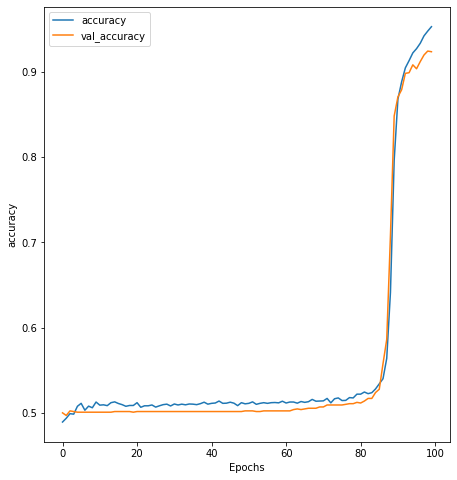

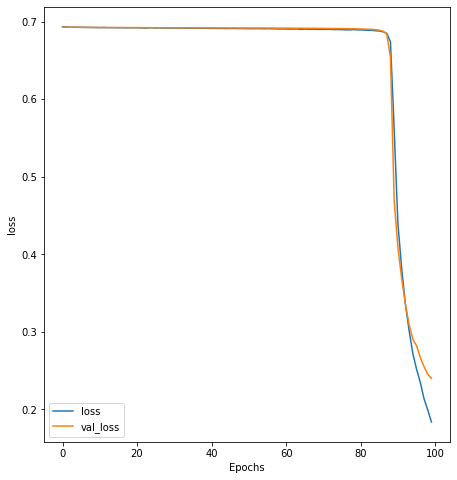

Test Accuracy: 0.89670
Test Precision: 0.39655
Test Recall: 0.28049
Test F1: 0.32857


In [8]:
model=GRU_model(embedding_layer)
fit_=model.fit(x=X,y=Y,epochs=100,validation_split=0.2)
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
chart(fit_,'accuracy')
plt.figure(figsize=(16,8))
plt.subplot(1,2,2)
chart(fit_,'loss')
Y_preds=model.predict(X_test)
Y_preds_label=np.round(Y_preds)
Y_label=test_data.class_label.tolist()
print("Test Accuracy: %.5f" %accuracy_score(Y_label,Y_preds_label))
print("Test Precision: %.5f" %precision_score(Y_label,Y_preds_label)) 
print("Test Recall: %.5f" %recall_score(Y_label,Y_preds_label)) 
print("Test F1: %.5f" %f1_score(Y_label,Y_preds_label)) 

## TFIDF

In [9]:
stopword=set(stopwords.words('english'))
vectorizer=tfidf(stop_words=stopword,ngram_range=(1,2),max_features=500000)
vectorizer.fit(train['tweet_text'])
x_train=vectorizer.transform(train['tweet_text'])
y_train=train['class_label']
x_test=vectorizer.transform(test['tweet_text'])
y_test=test['class_label']
clf=LogisticRegressionCV()
clf.fit(x_train,y_train)
pred= clf.predict(x_test)
print('accuracy=',accuracy_score(y_test,pred))
print(classification_report(y_test, pred))

accuracy= 0.9076923076923077
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       828
           1       0.48      0.24      0.32        82

    accuracy                           0.91       910
   macro avg       0.70      0.61      0.64       910
weighted avg       0.89      0.91      0.89       910



In [10]:
print("Test Accuracy: %.5f" %accuracy_score(y_test,pred))
print("Test Precision: %.5f" %precision_score(y_test,pred)) 
print("Test Recall: %.5f" %recall_score(y_test,pred)) 
print("Test F1: %.5f" %f1_score(y_test,pred)) 

Test Accuracy: 0.90769
Test Precision: 0.47619
Test Recall: 0.24390
Test F1: 0.32258


## BERT

In [ ]:
# https://huggingface.co/docs/transformers/main/en/index

In [11]:
tokenizer=BertTokenizer.from_pretrained('bert-base-uncased',do_lower_case=True)
encoded_data_train=tokenizer.batch_encode_plus(train.tweet_text.values,add_special_tokens=True,return_attention_mask=True,pad_to_max_length=True,max_length=60,return_tensors='pt')
encoded_data_val=tokenizer.batch_encode_plus(test.tweet_text.values,add_special_tokens=True,return_attention_mask=True,pad_to_max_length=True,max_length=60, return_tensors='pt')
input_ids_train=encoded_data_train['input_ids']
attention_masks_train=encoded_data_train['attention_mask']
labels_train=torch.tensor(train.class_label.values,dtype=torch.long)
input_ids_val=encoded_data_val['input_ids']
attention_masks_val=encoded_data_val['attention_mask']
labels_val=torch.tensor(test.class_label.values,dtype=torch.long)
dataset_train=TensorDataset(input_ids_train,attention_masks_train,labels_train)
dataset_val=TensorDataset(input_ids_val,attention_masks_val,labels_val)

model=BertForSequenceClassification.from_pretrained('bert-base-uncased',num_labels=2,output_attentions=False,output_hidden_states=False)
dataloader_train=DataLoader(dataset_train,sampler=RandomSampler(dataset_train),batch_size=5)
dataloader_val=DataLoader(dataset_val,sampler=RandomSampler(dataset_val),batch_size=32)
optimizer = AdamW(model.parameters(),lr=1e-5,eps=1e-8)
epochs=10
scheduler=get_linear_schedule_with_warmup(optimizer,num_warmup_steps=0,num_training_steps=len(dataloader_train)*epochs)

def f1_score_func(preds,labels):
    preds_flat=np.argmax(preds,axis=1).flatten()
    labels_flat=labels.flatten()
    return f1_score(labels_flat,preds_flat,average='macro')

def accuracy_score_func(preds,labels):
    preds_flat=np.argmax(preds,axis=1).flatten()
    labels_flat=labels.flatten()
    return accuracy_score(labels_flat,preds_flat)

def evaluate(dataloader_val):
    model.eval()
    loss_val_total=0
    predictions,true_vals=[],[]
    for batch in dataloader_val:
        batch=tuple(b.to(device) for b in batch)
        inputs={'input_ids':batch[0],'attention_mask': batch[1],'labels':batch[2]}
        with torch.no_grad():        
            outputs=model(**inputs)
        loss=outputs[0]
        logits=outputs[1]
        loss_val_total+=loss.item()
        logits=logits.detach().cpu().numpy()
        label_ids=inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
    loss_val_avg=loss_val_total/len(dataloader_val) 
    predictions=np.concatenate(predictions,axis=0)
    true_vals=np.concatenate(true_vals,axis=0)
    return loss_val_avg,predictions,true_vals

seed_val=200
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model.to(device)
print(device)
for epoch in tqdm(range(1,epochs+1)):
    model.train()
    loss_train_total=0
    progress_bar=tqdm(dataloader_train,desc='Epoch {:1d}'.format(epoch),leave=False,disable=False)
    for batch in progress_bar:
        model.zero_grad()
        batch=tuple(b.to(device) for b in batch)
        inputs={'input_ids':batch[0],'attention_mask':batch[1],'labels':batch[2]}
        outputs=model(**inputs)
        loss=outputs[0]
        loss_train_total+=loss.item()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(),1.0)
        optimizer.step()
        scheduler.step()
        progress_bar.set_postfix({'training_loss':'{:.3f}'.format(loss.item()/len(batch))})
    torch.save(model.state_dict(),f'BERT_ft_epoch{epoch}.model')
    tqdm.write('\nEpoch {epoch}')
    loss_train_avg=loss_train_total/len(dataloader_train)
    tqdm.write(f'Training loss:{loss_train_avg}')
    val_loss,predictions,true_vals=evaluate(dataloader_val)
    val_f1=f1_score_func(predictions,true_vals)
    val_acc=accuracy_score_func(predictions,true_vals)
    tqdm.write(f'Val loss: {val_loss}')
    tqdm.write(f'f1 score: {val_f1}')
    tqdm.write(f'Acc score: {val_acc}')

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
c:\Users\Ying Jhu\anaconda3\envs\env_1\lib\site-packages\transformers\tokenization_utils_base.py:2271: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
Some weights of the model checkpoint at bert-base-uncased were not used when initi

cuda:0


  0%|          | 0/10 [01:42<?, ?it/s]


Epoch {epoch}
Training loss:0.32740770642061706


 10%|█         | 1/10 [01:44<15:37, 104.16s/it]

Val loss: 0.49107029378927985
f1 score: 0.5623536299765808
Acc score: 0.8989010989010989


 10%|█         | 1/10 [03:23<15:37, 104.16s/it]


Epoch {epoch}
Training loss:0.11045629180085446


 20%|██        | 2/10 [03:25<13:37, 102.22s/it]

Val loss: 0.5647968192913987
f1 score: 0.6046457741991542
Acc score: 0.9010989010989011


 20%|██        | 2/10 [05:03<13:37, 102.22s/it]


Epoch {epoch}
Training loss:0.03868819420032913


 30%|███       | 3/10 [05:05<11:49, 101.40s/it]

Val loss: 0.7369356509157585
f1 score: 0.5492173223839194
Acc score: 0.9010989010989011


 30%|███       | 3/10 [06:44<11:49, 101.40s/it]


Epoch {epoch}
Training loss:0.020897770609994003


 40%|████      | 4/10 [06:46<10:06, 101.07s/it]

Val loss: 0.7817129868537825
f1 score: 0.6106508875739645
Acc score: 0.8967032967032967


 40%|████      | 4/10 [08:26<10:06, 101.07s/it]


Epoch {epoch}
Training loss:0.014098671224246049


 50%|█████     | 5/10 [08:27<08:26, 101.34s/it]

Val loss: 0.9850433229816001
f1 score: 0.5650182238244139
Acc score: 0.8945054945054945


 50%|█████     | 5/10 [10:07<08:26, 101.34s/it]


Epoch {epoch}
Training loss:0.0089204383796607


 60%|██████    | 6/10 [10:09<06:45, 101.32s/it]

Val loss: 1.0057936649898003
f1 score: 0.6088805892727462
Acc score: 0.9043956043956044


 60%|██████    | 6/10 [11:47<06:45, 101.32s/it]


Epoch {epoch}
Training loss:0.0035953404948066226


 70%|███████   | 7/10 [11:49<05:02, 100.98s/it]

Val loss: 1.1274546078877454
f1 score: 0.6019096165550822
Acc score: 0.8989010989010989


 70%|███████   | 7/10 [13:28<05:02, 100.98s/it]


Epoch {epoch}
Training loss:0.008574459282377123


 80%|████████  | 8/10 [13:29<03:21, 100.77s/it]

Val loss: 1.0298294377461514
f1 score: 0.5839447102604998
Acc score: 0.9054945054945055


 80%|████████  | 8/10 [15:09<03:21, 100.77s/it]


Epoch {epoch}
Training loss:0.0004946391810972203


 90%|█████████ | 9/10 [15:10<01:40, 100.85s/it]

Val loss: 1.091805511654143
f1 score: 0.5752593462517127
Acc score: 0.8978021978021978


 90%|█████████ | 9/10 [16:50<01:40, 100.85s/it]


Epoch {epoch}
Training loss:0.000862909733471728


100%|██████████| 10/10 [16:52<00:00, 101.22s/it]

Val loss: 1.1180490576499198
f1 score: 0.5740803441614053
Acc score: 0.8967032967032967


In [12]:
predictions=np.argmax(predictions,axis=1).flatten()
true_vals=true_vals.flatten()
print("Test Accuracy: %.5f" %accuracy_score(true_vals,predictions))
print("Test Precision: %.5f" %precision_score(true_vals,predictions)) 
print("Test Recall: %.5f" %recall_score(true_vals,predictions)) 
print("Test F1: %.5f" %f1_score(true_vals,predictions)) 

Test Accuracy: 0.89670
Test Precision: 0.33333
Test Recall: 0.14634
Test F1: 0.20339


## Sentiment feature

In [11]:
from textblob import TextBlob
train["sentiment_score"]=train["tweet_text"].apply(lambda x:TextBlob(str(x)).sentiment.polarity)
train["sentiment"]=np.select([train["sentiment_score"]<0,train["sentiment_score"]==0,train["sentiment_score"]>0],['neg','neu','pos'])
test["sentiment_score"]=test["tweet_text"].apply(lambda x:TextBlob(str(x)).sentiment.polarity)
test["sentiment"]=np.select([test["sentiment_score"]<0,test["sentiment_score"]==0,test["sentiment_score"]>0],['neg','neu','pos'])
vocab_list=dict(vocab_list)
def get_key(d,val):
    for key, value in d.items():
         if val == value:
             return key

X_emb=[]
for i in range(len(X)):
    emb=[]
    for j in X[i]:
        if j!=0:
            emb.extend(vocab_list[get_key(word2idx,j)])
        else:
            emb.extend(np.repeat(np.array(0),500))
    X_emb.append(emb)
X_emb=pd.DataFrame(X_emb)

X_test_emb=[]
for i in range(len(X_test)):
    emb=[]
    for j in X_test[i]:
        if j!=0:
            emb.extend(vocab_list[get_key(word2idx,j)])
        else:
            emb.extend(np.repeat(np.array(0),500))
    X_test_emb.append(emb)
X_test_emb=pd.DataFrame(X_test_emb)

x_train_sen=X_emb.merge(train["sentiment"],how='outer',left_index=True,right_index=True)
x_test_sen=X_test_emb.merge(test["sentiment"],how='outer',left_index=True,right_index=True)
label_encoder = preprocessing.LabelEncoder()
x_train_sen["sentiment"]=label_encoder.fit_transform(x_train_sen["sentiment"])
x_test_sen["sentiment"]=label_encoder.fit_transform(x_test_sen["sentiment"])

clf=LogisticRegressionCV()
clf.fit(x_train_sen,y_train)
pred= clf.predict(x_test_sen)
print('accuracy=',accuracy_score(y_test,pred))
print(classification_report(y_test, pred))
print("Test Accuracy: %.5f" %accuracy_score(y_test,pred))
print("Test Precision: %.5f" %precision_score(y_test,pred)) 
print("Test Recall: %.5f" %recall_score(y_test,pred)) 
print("Test F1: %.5f" %f1_score(y_test,pred)) 

c:\Users\Ying Jhu\anaconda3\envs\env_1\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Ying Jhu\anaconda3\envs\env_1\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Ying Jhu\anaconda3\envs\env_1\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the num

accuracy= 0.6472527472527473
              precision    recall  f1-score   support

           0       0.92      0.67      0.78       828
           1       0.11      0.39      0.17        82

    accuracy                           0.65       910
   macro avg       0.51      0.53      0.47       910
weighted avg       0.84      0.65      0.72       910

Test Accuracy: 0.64725
Test Precision: 0.10561
Test Recall: 0.39024
Test F1: 0.16623


## TextGCN

In [13]:
train_texts, test_texts, train_labels, test_labels = train['tweet_text'], test['tweet_text'], train['class_label'], test['class_label']

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_texts)

train_sequences = tokenizer.texts_to_sequences(train_texts)
test_sequences = tokenizer.texts_to_sequences(test_texts)

class PMIModel(object):
    def __init__(self):
        self.word_counter = None
        self.pair_counter = None
    def get_pair_id(self, word0, word1):
        pair_id = tuple(sorted([word0, word1]))
        return pair_id
    def fit(self, sequences, window_size):
        self.word_counter = Counter()
        self.pair_counter = Counter()
        num_windows = 2
        for sequence in tqdm(sequences):
            for offset in range(len(sequence) - window_size):
                window = sequence[offset:offset + window_size]
                num_windows += 1
                for i, word0 in enumerate(window):
                    self.word_counter[word0] += 1
                    for j, word1 in enumerate(window[i + 1:]):
                        pair_id = self.get_pair_id(word0, word1)
                        self.pair_counter[pair_id] += 1
        for word, count in self.word_counter.items():
            self.word_counter[word] = count / num_windows
        for pair_id, count in self.pair_counter.items():
            self.pair_counter[pair_id] = count / num_windows
    def transform(self, word0, word1):
        prob_a = self.word_counter[word0]
        prob_b = self.word_counter[word1]
        pair_id = self.get_pair_id(word0, word1)
        prob_pair = self.pair_counter[pair_id]
        if prob_a == 0 or prob_b == 0 or prob_pair == 0:
            return 0
        pmi = np.log(prob_pair / (prob_a * prob_b))
        # print(word0, word1, pmi)
        pmi = np.maximum(pmi, 0.0)
        # print(pmi)
        return pmi

def build_word_graph(num_words, pmi_model, embedding_size):
    x = tf.Variable(tf.random.truncated_normal([num_words, embedding_size], stddev=1 / np.sqrt(embedding_size)), dtype=tf.float32)
    edges = []
    edge_weight = []
    for (word0, word1) in pmi_model.pair_counter.keys():
        pmi = pmi_model.transform(word0, word1)
        if pmi > 0:
            edges.append([word0, word1])
            edge_weight.append(pmi)
            edges.append([word1, word0])
            edge_weight.append(pmi)
    edge_index = np.array(edges).T
    return tfg.Graph(x=x, edge_index=edge_index, edge_weight=edge_weight)

def build_combined_graph(word_graph, sequences, embedding_size):
    num_words = word_graph.num_nodes
    x = tf.zeros([len(sequences), embedding_size], dtype=tf.float32)
    edges = []
    edge_weight = []
    for i, sequence in enumerate(sequences):
        doc_node_index = num_words + i
        for word in sequence:
            edges.append([doc_node_index, word])  # only directed edge
            edge_weight.append(1.0)  # use BOW instaead of TF-IDF
    edge_index = np.array(edges).T
    x = tf.concat([word_graph.x, x], axis=0)
    edge_index = np.concatenate([word_graph.edge_index, edge_index], axis=1)
    edge_weight = np.concatenate([word_graph.edge_weight, edge_weight], axis=0)
    return tfg.Graph(x=x, edge_index=edge_index, edge_weight=edge_weight)

# building PMI model is time consuming, using cache to optimize
pmi_cache_path = "cached_pmi_model.p"
if os.path.exists(pmi_cache_path):
    with open(pmi_cache_path, "rb") as f:
        pmi_model = pickle.load(f)
else:
    pmi_model = PMIModel()
    pmi_model.fit(train_sequences, window_size=6)
    with open(pmi_cache_path, "wb") as f:
        pickle.dump(pmi_model, f)

embedding_size = 500 #150
num_words = len(tokenizer.word_index) + 1
word_graph = build_word_graph(num_words, pmi_model, embedding_size)
train_combined_graph = build_combined_graph(word_graph, train_sequences, embedding_size)
test_combined_graph = build_combined_graph(word_graph, test_sequences, embedding_size)

print(word_graph)
print(train_combined_graph)
print(test_combined_graph)

num_classes = 2

class GCNModel(tf.keras.Model):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.gcn0 = tfg.layers.GCN(100, activation=tf.nn.relu)
        self.gcn1 = tfg.layers.GCN(num_classes)
        self.dropout = keras.layers.Dropout(0.2) #0.5
    def call(self, inputs, training=None, mask=None, cache=None):
        x, edge_index, edge_weight = inputs
        h = self.gcn0([x, edge_index, edge_weight], cache=cache)
        h = self.dropout(h, training=training)
        h = self.gcn1([h, edge_index, edge_weight], cache=cache)
        return h

model = GCNModel()
model.gcn0.cache_normed_edge(train_combined_graph)
model.gcn0.cache_normed_edge(test_combined_graph)

@tf_utils.function
def forward(graph, training=False):
    logits = model([graph.x, graph.edge_index, graph.edge_weight], cache=graph.cache, training=training)
    logits = logits[num_words:]
    return logits

def compute_loss(logits, labels):
    losses = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=tf.one_hot(labels, depth=num_classes))
    mean_loss = tf.reduce_mean(losses)
    return mean_loss

optimizer = tf.keras.optimizers.Adam(learning_rate=5e-2)
for step in tqdm(range(1000)):
    with tf.GradientTape() as tape:
        logits = forward(train_combined_graph, training=True)
        mean_loss = compute_loss(logits, train_labels)
    vars = tape.watched_variables()
    grads = tape.gradient(mean_loss, vars)
    optimizer.apply_gradients(zip(grads, vars))
    if step % 10 == 0:
        logits = forward(test_combined_graph)
        preds = tf.argmax(logits, axis=-1)
        corrects = tf.cast(tf.equal(preds, test_labels), tf.float32)
        accuracy = tf.reduce_mean(corrects)
        print("step = {}\tloss = {}\ttest_accuracy = {}".format(step, mean_loss, accuracy))
        print("Test Accuracy: %.5f" %accuracy_score(test_labels,preds))
        print("Test Precision: %.5f" %precision_score(test_labels,preds)) 
        print("Test Recall: %.5f" %recall_score(test_labels,preds)) 
        print("Test F1: %.5f" %f1_score(test_labels,preds)) 

c:\Users\Ying Jhu\anaconda3\envs\env_1\lib\site-packages\tf_geometric\layers\conv\gcn.py:79: DeprecationWarning: 'GCN.cache_normed_edge(graph, override)' is deprecated, use 'GCN.build_cache_for_graph(graph, override)' instead
  warnings.warn("'GCN.cache_normed_edge(graph, override)' is deprecated, use 'GCN.build_cache_for_graph(graph, override)' instead", DeprecationWarning)
c:\Users\Ying Jhu\anaconda3\envs\env_1\lib\site-packages\tf_geometric\layers\conv\gcn.py:79: DeprecationWarning: 'GCN.cache_normed_edge(graph, override)' is deprecated, use 'GCN.build_cache_for_graph(graph, override)' instead
  warnings.warn("'GCN.cache_normed_edge(graph, override)' is deprecated, use 'GCN.build_cache_for_graph(graph, override)' instead", DeprecationWarning)


Graph Shape: x => (20181, 500)	edge_index => (2, 485068)	y => None
Graph Shape: x => (26692, 500)	edge_index => (2, 743868)	y => None
Graph Shape: x => (21091, 500)	edge_index => (2, 516596)	y => None


  0%|          | 0/1000 [00:00<?, ?it/s]c:\Users\Ying Jhu\anaconda3\envs\env_1\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
  0%|          | 3/1000 [00:03<15:02,  1.11it/s]

step = 0	loss = 0.6921458840370178	test_accuracy = 0.9098901152610779
Test Accuracy: 0.90989
Test Precision: 0.00000
Test Recall: 0.00000
Test F1: 0.00000


  3%|▎         | 27/1000 [00:03<00:54, 17.83it/s]

step = 10	loss = 0.5750411748886108	test_accuracy = 0.3032967150211334
Test Accuracy: 0.30330
Test Precision: 0.09412
Test Recall: 0.78049
Test F1: 0.16798
step = 20	loss = 0.4630354344844818	test_accuracy = 0.33076924085617065
Test Accuracy: 0.33077
Test Precision: 0.09524
Test Recall: 0.75610
Test F1: 0.16917


  4%|▍         | 45/1000 [00:03<00:26, 35.55it/s]

step = 30	loss = 0.34896788001060486	test_accuracy = 0.3340659439563751
Test Accuracy: 0.33407
Test Precision: 0.09190
Test Recall: 0.71951
Test F1: 0.16298
step = 40	loss = 0.27917876839637756	test_accuracy = 0.4208791255950928
Test Accuracy: 0.42088
Test Precision: 0.10619
Test Recall: 0.73171
Test F1: 0.18547


  6%|▋         | 63/1000 [00:04<00:17, 53.46it/s]

step = 50	loss = 0.23374015092849731	test_accuracy = 0.6274725198745728
Test Accuracy: 0.62747
Test Precision: 0.13598
Test Recall: 0.58537
Test F1: 0.22069
step = 60	loss = 0.20112842321395874	test_accuracy = 0.6582417488098145
Test Accuracy: 0.65824
Test Precision: 0.14330
Test Recall: 0.56098
Test F1: 0.22829


  8%|▊         | 81/1000 [00:04<00:13, 67.78it/s]

step = 70	loss = 0.17314721643924713	test_accuracy = 0.7296703457832336
Test Accuracy: 0.72967
Test Precision: 0.17460
Test Recall: 0.53659
Test F1: 0.26347
step = 80	loss = 0.15478506684303284	test_accuracy = 0.692307710647583
Test Accuracy: 0.69231
Test Precision: 0.15625
Test Recall: 0.54878
Test F1: 0.24324


 10%|█         | 101/1000 [00:04<00:11, 78.20it/s]

step = 90	loss = 0.13623937964439392	test_accuracy = 0.7296703457832336
Test Accuracy: 0.72967
Test Precision: 0.16667
Test Recall: 0.50000
Test F1: 0.25000
step = 100	loss = 0.13143087923526764	test_accuracy = 0.7263736128807068
Test Accuracy: 0.72637
Test Precision: 0.16466
Test Recall: 0.50000
Test F1: 0.24773


 12%|█▏        | 121/1000 [00:04<00:10, 84.04it/s]

step = 110	loss = 0.1138099655508995	test_accuracy = 0.708791196346283
Test Accuracy: 0.70879
Test Precision: 0.15985
Test Recall: 0.52439
Test F1: 0.24501
step = 120	loss = 0.10620272904634476	test_accuracy = 0.7571428418159485
Test Accuracy: 0.75714
Test Precision: 0.18265
Test Recall: 0.48780
Test F1: 0.26578


 14%|█▍        | 141/1000 [00:05<00:09, 86.67it/s]

step = 130	loss = 0.08955313265323639	test_accuracy = 0.7153846025466919
Test Accuracy: 0.71538
Test Precision: 0.16350
Test Recall: 0.52439
Test F1: 0.24928
step = 140	loss = 0.08857043832540512	test_accuracy = 0.7879120707511902
Test Accuracy: 0.78791
Test Precision: 0.19672
Test Recall: 0.43902
Test F1: 0.27170


 16%|█▌        | 161/1000 [00:05<00:09, 88.15it/s]

step = 150	loss = 0.08045137673616409	test_accuracy = 0.7813186645507812
Test Accuracy: 0.78132
Test Precision: 0.19048
Test Recall: 0.43902
Test F1: 0.26568
step = 160	loss = 0.07512573152780533	test_accuracy = 0.7604395747184753
Test Accuracy: 0.76044
Test Precision: 0.17925
Test Recall: 0.46341
Test F1: 0.25850


 18%|█▊        | 181/1000 [00:05<00:09, 88.41it/s]

step = 170	loss = 0.07120911031961441	test_accuracy = 0.7626373767852783
Test Accuracy: 0.76264
Test Precision: 0.18095
Test Recall: 0.46341
Test F1: 0.26027
step = 180	loss = 0.07024487853050232	test_accuracy = 0.7615384459495544
Test Accuracy: 0.76154
Test Precision: 0.18310
Test Recall: 0.47561
Test F1: 0.26441


 20%|██        | 201/1000 [00:05<00:08, 88.85it/s]

step = 190	loss = 0.057819049805402756	test_accuracy = 0.7395604252815247
Test Accuracy: 0.73956
Test Precision: 0.16738
Test Recall: 0.47561
Test F1: 0.24762
step = 200	loss = 0.061194710433483124	test_accuracy = 0.7648351788520813
Test Accuracy: 0.76484
Test Precision: 0.17961
Test Recall: 0.45122
Test F1: 0.25694


 22%|██▏       | 221/1000 [00:05<00:08, 89.23it/s]

step = 210	loss = 0.051441773772239685	test_accuracy = 0.7648351788520813
Test Accuracy: 0.76484
Test Precision: 0.18269
Test Recall: 0.46341
Test F1: 0.26207
step = 220	loss = 0.05982377007603645	test_accuracy = 0.7571428418159485
Test Accuracy: 0.75714
Test Precision: 0.18265
Test Recall: 0.48780
Test F1: 0.26578


 24%|██▍       | 241/1000 [00:06<00:08, 89.32it/s]

step = 230	loss = 0.04634536802768707	test_accuracy = 0.7857142686843872
Test Accuracy: 0.78571
Test Precision: 0.19126
Test Recall: 0.42683
Test F1: 0.26415
step = 240	loss = 0.04558107629418373	test_accuracy = 0.791208803653717
Test Accuracy: 0.79121
Test Precision: 0.19318
Test Recall: 0.41463
Test F1: 0.26357


 26%|██▌       | 261/1000 [00:06<00:08, 89.12it/s]

step = 250	loss = 0.04264986142516136	test_accuracy = 0.7989010810852051
Test Accuracy: 0.79890
Test Precision: 0.19018
Test Recall: 0.37805
Test F1: 0.25306
step = 260	loss = 0.04212963208556175	test_accuracy = 0.807692289352417
Test Accuracy: 0.80769
Test Precision: 0.20382
Test Recall: 0.39024
Test F1: 0.26778


 28%|██▊       | 281/1000 [00:06<00:08, 89.62it/s]

step = 270	loss = 0.03950118646025658	test_accuracy = 0.7846153974533081
Test Accuracy: 0.78462
Test Precision: 0.17978
Test Recall: 0.39024
Test F1: 0.24615
step = 280	loss = 0.035412222146987915	test_accuracy = 0.7923076748847961
Test Accuracy: 0.79231
Test Precision: 0.18713
Test Recall: 0.39024
Test F1: 0.25296


 30%|███       | 301/1000 [00:06<00:07, 89.20it/s]

step = 290	loss = 0.04620799049735069	test_accuracy = 0.80989009141922
Test Accuracy: 0.80989
Test Precision: 0.19868
Test Recall: 0.36585
Test F1: 0.25751
step = 300	loss = 0.03931599482893944	test_accuracy = 0.803296685218811
Test Accuracy: 0.80330
Test Precision: 0.19108
Test Recall: 0.36585
Test F1: 0.25105


 32%|███▏      | 321/1000 [00:07<00:07, 89.00it/s]

step = 310	loss = 0.03421838954091072	test_accuracy = 0.7604395747184753
Test Accuracy: 0.76044
Test Precision: 0.17619
Test Recall: 0.45122
Test F1: 0.25342
step = 320	loss = 0.03250943869352341	test_accuracy = 0.7494505643844604
Test Accuracy: 0.74945
Test Precision: 0.17411
Test Recall: 0.47561
Test F1: 0.25490


 34%|███▍      | 341/1000 [00:07<00:07, 89.47it/s]

step = 330	loss = 0.03269683197140694	test_accuracy = 0.7483516335487366
Test Accuracy: 0.74835
Test Precision: 0.17040
Test Recall: 0.46341
Test F1: 0.24918
step = 340	loss = 0.037387650460004807	test_accuracy = 0.805494487285614
Test Accuracy: 0.80549
Test Precision: 0.19745
Test Recall: 0.37805
Test F1: 0.25941


 36%|███▌      | 361/1000 [00:07<00:07, 89.77it/s]

step = 350	loss = 0.02714417688548565	test_accuracy = 0.8065934181213379
Test Accuracy: 0.80659
Test Precision: 0.19872
Test Recall: 0.37805
Test F1: 0.26050
step = 360	loss = 0.027199096977710724	test_accuracy = 0.7824175953865051
Test Accuracy: 0.78242
Test Precision: 0.19474
Test Recall: 0.45122
Test F1: 0.27206


 38%|███▊      | 381/1000 [00:07<00:06, 89.92it/s]

step = 370	loss = 0.022534243762493134	test_accuracy = 0.7824175953865051
Test Accuracy: 0.78242
Test Precision: 0.19149
Test Recall: 0.43902
Test F1: 0.26667
step = 380	loss = 0.02973249740898609	test_accuracy = 0.8109890222549438
Test Accuracy: 0.81099
Test Precision: 0.20779
Test Recall: 0.39024
Test F1: 0.27119


 40%|████      | 401/1000 [00:07<00:06, 89.93it/s]

step = 390	loss = 0.02477419376373291	test_accuracy = 0.7791208624839783
Test Accuracy: 0.77912
Test Precision: 0.18519
Test Recall: 0.42683
Test F1: 0.25830
step = 400	loss = 0.024596771225333214	test_accuracy = 0.8153846263885498
Test Accuracy: 0.81538
Test Precision: 0.20946
Test Recall: 0.37805
Test F1: 0.26957


 42%|████▏     | 421/1000 [00:08<00:06, 89.95it/s]

step = 410	loss = 0.025926513597369194	test_accuracy = 0.7769230604171753
Test Accuracy: 0.77692
Test Precision: 0.17297
Test Recall: 0.39024
Test F1: 0.23970
step = 420	loss = 0.02082178182899952	test_accuracy = 0.7989010810852051
Test Accuracy: 0.79890
Test Precision: 0.18634
Test Recall: 0.36585
Test F1: 0.24691


 44%|████▍     | 441/1000 [00:08<00:06, 89.77it/s]

step = 430	loss = 0.02239394001662731	test_accuracy = 0.7890110015869141
Test Accuracy: 0.78901
Test Precision: 0.18750
Test Recall: 0.40244
Test F1: 0.25581
step = 440	loss = 0.019177507609128952	test_accuracy = 0.79340660572052
Test Accuracy: 0.79341
Test Precision: 0.18072
Test Recall: 0.36585
Test F1: 0.24194


 46%|████▌     | 461/1000 [00:08<00:06, 89.27it/s]

step = 450	loss = 0.019423561170697212	test_accuracy = 0.803296685218811
Test Accuracy: 0.80330
Test Precision: 0.19497
Test Recall: 0.37805
Test F1: 0.25726
step = 460	loss = 0.02377856895327568	test_accuracy = 0.7824175953865051
Test Accuracy: 0.78242
Test Precision: 0.18478
Test Recall: 0.41463
Test F1: 0.25564


 48%|████▊     | 481/1000 [00:08<00:05, 89.27it/s]

step = 470	loss = 0.026196928694844246	test_accuracy = 0.7835164666175842
Test Accuracy: 0.78352
Test Precision: 0.17877
Test Recall: 0.39024
Test F1: 0.24521
step = 480	loss = 0.02243088372051716	test_accuracy = 0.812087893486023
Test Accuracy: 0.81209
Test Precision: 0.20530
Test Recall: 0.37805
Test F1: 0.26609


 50%|█████     | 501/1000 [00:09<00:05, 89.43it/s]

step = 490	loss = 0.0209891926497221	test_accuracy = 0.7516483664512634
Test Accuracy: 0.75165
Test Precision: 0.16972
Test Recall: 0.45122
Test F1: 0.24667
step = 500	loss = 0.018103202804923058	test_accuracy = 0.795604407787323
Test Accuracy: 0.79560
Test Precision: 0.18675
Test Recall: 0.37805
Test F1: 0.25000


 52%|█████▏    | 521/1000 [00:09<00:05, 89.35it/s]

step = 510	loss = 0.019208937883377075	test_accuracy = 0.7824175953865051
Test Accuracy: 0.78242
Test Precision: 0.17778
Test Recall: 0.39024
Test F1: 0.24427
step = 520	loss = 0.021295607089996338	test_accuracy = 0.7989010810852051
Test Accuracy: 0.79890
Test Precision: 0.19394
Test Recall: 0.39024
Test F1: 0.25911


 54%|█████▍    | 541/1000 [00:09<00:05, 89.40it/s]

step = 530	loss = 0.014936068095266819	test_accuracy = 0.7923076748847961
Test Accuracy: 0.79231
Test Precision: 0.18713
Test Recall: 0.39024
Test F1: 0.25296
step = 540	loss = 0.01898135431110859	test_accuracy = 0.791208803653717
Test Accuracy: 0.79121
Test Precision: 0.18605
Test Recall: 0.39024
Test F1: 0.25197


 56%|█████▌    | 561/1000 [00:09<00:04, 89.33it/s]

step = 550	loss = 0.022251663729548454	test_accuracy = 0.8065934181213379
Test Accuracy: 0.80659
Test Precision: 0.19481
Test Recall: 0.36585
Test F1: 0.25424
step = 560	loss = 0.015207313001155853	test_accuracy = 0.807692289352417
Test Accuracy: 0.80769
Test Precision: 0.19608
Test Recall: 0.36585
Test F1: 0.25532


 58%|█████▊    | 581/1000 [00:09<00:04, 88.89it/s]

step = 570	loss = 0.019508717581629753	test_accuracy = 0.7725274562835693
Test Accuracy: 0.77253
Test Precision: 0.18274
Test Recall: 0.43902
Test F1: 0.25806
step = 580	loss = 0.018580006435513496	test_accuracy = 0.8274725079536438
Test Accuracy: 0.82747
Test Precision: 0.21374
Test Recall: 0.34146
Test F1: 0.26291


 60%|██████    | 601/1000 [00:10<00:04, 88.90it/s]

step = 590	loss = 0.02308519184589386	test_accuracy = 0.7780219912528992
Test Accuracy: 0.77802
Test Precision: 0.18421
Test Recall: 0.42683
Test F1: 0.25735
step = 600	loss = 0.019622184336185455	test_accuracy = 0.8175824284553528
Test Accuracy: 0.81758
Test Precision: 0.20833
Test Recall: 0.36585
Test F1: 0.26549


 62%|██████▏   | 621/1000 [00:10<00:04, 88.85it/s]

step = 610	loss = 0.021250272169709206	test_accuracy = 0.7835164666175842
Test Accuracy: 0.78352
Test Precision: 0.17877
Test Recall: 0.39024
Test F1: 0.24521
step = 620	loss = 0.013249796815216541	test_accuracy = 0.8197802305221558
Test Accuracy: 0.81978
Test Precision: 0.21127
Test Recall: 0.36585
Test F1: 0.26786


 64%|██████▍   | 641/1000 [00:10<00:04, 88.82it/s]

step = 630	loss = 0.031033899635076523	test_accuracy = 0.8021978139877319
Test Accuracy: 0.80220
Test Precision: 0.19753
Test Recall: 0.39024
Test F1: 0.26230
step = 640	loss = 0.014529521577060223	test_accuracy = 0.7769230604171753
Test Accuracy: 0.77692
Test Precision: 0.17989
Test Recall: 0.41463
Test F1: 0.25092


 66%|██████▌   | 661/1000 [00:10<00:03, 88.58it/s]

step = 650	loss = 0.012278980575501919	test_accuracy = 0.8219780325889587
Test Accuracy: 0.82198
Test Precision: 0.21014
Test Recall: 0.35366
Test F1: 0.26364
step = 660	loss = 0.014784426428377628	test_accuracy = 0.7835164666175842
Test Accuracy: 0.78352
Test Precision: 0.17877
Test Recall: 0.39024
Test F1: 0.24521


 68%|██████▊   | 681/1000 [00:11<00:03, 88.75it/s]

step = 670	loss = 0.01153829786926508	test_accuracy = 0.800000011920929
Test Accuracy: 0.80000
Test Precision: 0.18750
Test Recall: 0.36585
Test F1: 0.24793
step = 680	loss = 0.011535698547959328	test_accuracy = 0.8131868243217468
Test Accuracy: 0.81319
Test Precision: 0.19444
Test Recall: 0.34146
Test F1: 0.24779


 70%|███████   | 701/1000 [00:11<00:03, 89.18it/s]

step = 690	loss = 0.012323829345405102	test_accuracy = 0.7846153974533081
Test Accuracy: 0.78462
Test Precision: 0.18333
Test Recall: 0.40244
Test F1: 0.25191
step = 700	loss = 0.011820663698017597	test_accuracy = 0.8153846263885498
Test Accuracy: 0.81538
Test Precision: 0.20139
Test Recall: 0.35366
Test F1: 0.25664


 72%|███████▏  | 721/1000 [00:11<00:03, 89.22it/s]

step = 710	loss = 0.012148365378379822	test_accuracy = 0.7835164666175842
Test Accuracy: 0.78352
Test Precision: 0.18232
Test Recall: 0.40244
Test F1: 0.25095
step = 720	loss = 0.009641225449740887	test_accuracy = 0.7879120707511902
Test Accuracy: 0.78791
Test Precision: 0.18994
Test Recall: 0.41463
Test F1: 0.26054


 74%|███████▍  | 741/1000 [00:11<00:02, 88.77it/s]

step = 730	loss = 0.009492170065641403	test_accuracy = 0.8065934181213379
Test Accuracy: 0.80659
Test Precision: 0.19079
Test Recall: 0.35366
Test F1: 0.24786
step = 740	loss = 0.011768502183258533	test_accuracy = 0.80989009141922
Test Accuracy: 0.80989
Test Precision: 0.19463
Test Recall: 0.35366
Test F1: 0.25108


 76%|███████▌  | 761/1000 [00:11<00:02, 88.95it/s]

step = 750	loss = 0.01392333023250103	test_accuracy = 0.797802209854126
Test Accuracy: 0.79780
Test Precision: 0.18519
Test Recall: 0.36585
Test F1: 0.24590
step = 760	loss = 0.01350786630064249	test_accuracy = 0.7890110015869141
Test Accuracy: 0.78901
Test Precision: 0.19444
Test Recall: 0.42683
Test F1: 0.26718


 78%|███████▊  | 781/1000 [00:12<00:02, 89.11it/s]

step = 770	loss = 0.010887673124670982	test_accuracy = 0.8164834976196289
Test Accuracy: 0.81648
Test Precision: 0.20280
Test Recall: 0.35366
Test F1: 0.25778
step = 780	loss = 0.009166965261101723	test_accuracy = 0.8109890222549438
Test Accuracy: 0.81099
Test Precision: 0.20000
Test Recall: 0.36585
Test F1: 0.25862


 80%|████████  | 801/1000 [00:12<00:02, 89.28it/s]

step = 790	loss = 0.015145408920943737	test_accuracy = 0.7901098728179932
Test Accuracy: 0.79011
Test Precision: 0.17751
Test Recall: 0.36585
Test F1: 0.23904
step = 800	loss = 0.014120240695774555	test_accuracy = 0.803296685218811
Test Accuracy: 0.80330
Test Precision: 0.19108
Test Recall: 0.36585
Test F1: 0.25105


 82%|████████▏ | 821/1000 [00:12<00:02, 89.44it/s]

step = 810	loss = 0.013793532736599445	test_accuracy = 0.7780219912528992
Test Accuracy: 0.77802
Test Precision: 0.17742
Test Recall: 0.40244
Test F1: 0.24627
step = 820	loss = 0.013775222934782505	test_accuracy = 0.8219780325889587
Test Accuracy: 0.82198
Test Precision: 0.21831
Test Recall: 0.37805
Test F1: 0.27679


 84%|████████▍ | 841/1000 [00:12<00:01, 89.18it/s]

step = 830	loss = 0.011728004552423954	test_accuracy = 0.8164834976196289
Test Accuracy: 0.81648
Test Precision: 0.21088
Test Recall: 0.37805
Test F1: 0.27074
step = 840	loss = 0.011951620690524578	test_accuracy = 0.800000011920929
Test Accuracy: 0.80000
Test Precision: 0.19880
Test Recall: 0.40244
Test F1: 0.26613


 86%|████████▌ | 861/1000 [00:13<00:01, 88.89it/s]

step = 850	loss = 0.013063156977295876	test_accuracy = 0.807692289352417
Test Accuracy: 0.80769
Test Precision: 0.19608
Test Recall: 0.36585
Test F1: 0.25532
step = 860	loss = 0.019486302509903908	test_accuracy = 0.800000011920929
Test Accuracy: 0.80000
Test Precision: 0.19136
Test Recall: 0.37805
Test F1: 0.25410


 88%|████████▊ | 881/1000 [00:13<00:01, 88.68it/s]

step = 870	loss = 0.010179855860769749	test_accuracy = 0.797802209854126
Test Accuracy: 0.79780
Test Precision: 0.18519
Test Recall: 0.36585
Test F1: 0.24590
step = 880	loss = 0.010056997649371624	test_accuracy = 0.8186812996864319
Test Accuracy: 0.81868
Test Precision: 0.20567
Test Recall: 0.35366
Test F1: 0.26009


 90%|█████████ | 901/1000 [00:13<00:01, 89.22it/s]

step = 890	loss = 0.00899588968604803	test_accuracy = 0.79340660572052
Test Accuracy: 0.79341
Test Precision: 0.18072
Test Recall: 0.36585
Test F1: 0.24194
step = 900	loss = 0.013471439480781555	test_accuracy = 0.8043956160545349
Test Accuracy: 0.80440
Test Precision: 0.18831
Test Recall: 0.35366
Test F1: 0.24576


 92%|█████████▏| 921/1000 [00:13<00:00, 89.00it/s]

step = 910	loss = 0.0068601886741817	test_accuracy = 0.7989010810852051
Test Accuracy: 0.79890
Test Precision: 0.18634
Test Recall: 0.36585
Test F1: 0.24691
step = 920	loss = 0.009460489265620708	test_accuracy = 0.8065934181213379
Test Accuracy: 0.80659
Test Precision: 0.19872
Test Recall: 0.37805
Test F1: 0.26050


 94%|█████████▍| 941/1000 [00:13<00:00, 88.90it/s]

step = 930	loss = 0.007659575901925564	test_accuracy = 0.7923076748847961
Test Accuracy: 0.79231
Test Precision: 0.19075
Test Recall: 0.40244
Test F1: 0.25882
step = 940	loss = 0.013020158745348454	test_accuracy = 0.7802197933197021
Test Accuracy: 0.78022
Test Precision: 0.17935
Test Recall: 0.40244
Test F1: 0.24812


 96%|█████████▌| 961/1000 [00:14<00:00, 88.68it/s]

step = 950	loss = 0.007492179051041603	test_accuracy = 0.8087912201881409
Test Accuracy: 0.80879
Test Precision: 0.20130
Test Recall: 0.37805
Test F1: 0.26271
step = 960	loss = 0.006150762550532818	test_accuracy = 0.800000011920929
Test Accuracy: 0.80000
Test Precision: 0.19512
Test Recall: 0.39024
Test F1: 0.26016


 98%|█████████▊| 981/1000 [00:14<00:00, 88.74it/s]

step = 970	loss = 0.008510136976838112	test_accuracy = 0.812087893486023
Test Accuracy: 0.81209
Test Precision: 0.20530
Test Recall: 0.37805
Test F1: 0.26609
step = 980	loss = 0.008337059058248997	test_accuracy = 0.8186812996864319
Test Accuracy: 0.81868
Test Precision: 0.20979
Test Recall: 0.36585
Test F1: 0.26667


100%|██████████| 1000/1000 [00:14<00:00, 68.29it/s]

step = 990	loss = 0.010543250478804111	test_accuracy = 0.807692289352417
Test Accuracy: 0.80769
Test Precision: 0.19608
Test Recall: 0.36585
Test F1: 0.25532
